In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [56]:
#US CRIME

#Display data frame of total number of violent crimes reported in the US from 1990 to 2017
crime_file = "US_ReportedCrimes_1990-2017.csv"
crime_df = pd.read_csv(crime_file)

In [57]:
#Display data frame of total number of R rated movies released in the US from 1990 to 2017
movie_file = "Movie_Year_R (1).csv"
movie_df = pd.read_csv(movie_file)
movie_df.head()

,Year,R
0,2017,157
1,2016,205
2,2015,201
3,2014,200
4,2013,214


In [58]:
#merge the movie and reported crimes files
crime_and_movie_df = pd.merge(movie_df,crime_df,on='Year',how='left')
crime_and_movie_df.head(10)


#organize and clean the data frame
rename_crime_and_movie_df = crime_and_movie_df.rename(columns={'R': 'Number of R-Rated Movies'})

rename_crime_and_movie_df.set_index('Year')
rename_crime_and_movie_df.head()

,Year,Number of R-Rated Movies,Reported Violent Crimes
0,2017,157,1247321
1,2016,205,1250162
2,2015,201,1199310
3,2014,200,1153022
4,2013,214,1168298


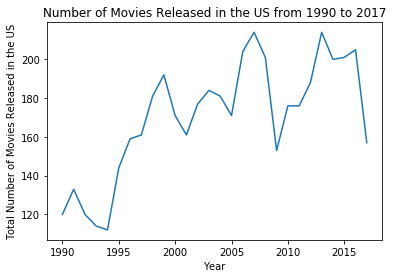

In [59]:
#generate the x values from 1990 to 2017 using a step of 1 year
year = np.arange(1990,2018,1)

number_R_movies = [120,133,120,114,112,144,159,161,181,192,171,161,177,184,181,171,204,214,201,153,176,176,188,214,200,201,205,157]

plt.xlabel('Year')
plt.ylabel('Total Number of Movies Released in the US')
plt.title('Number of Movies Released in the US from 1990 to 2017')

plt.plot(year,number_R_movies)
plt.grid()

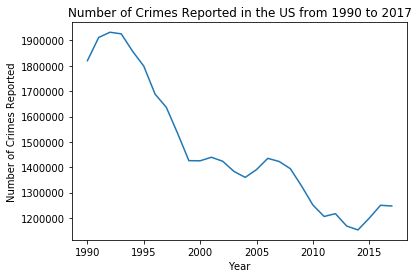

In [60]:
#plot number of crimes reported in the US

#generate the x values from 1990 to 2017 using a step of 1 year
year = np.arange(1990,2018,1)

crimes_reported = [(1820127),1911767,1932274,1926017,1857670,1798792,1688540,1636096,1533887,1426044,1425486,1439480,1423677,1383676,1360088,1390745,1435123,1422970,1394461,1325896,1251248,1206005,1217057,1168298,1153022,1199310,1250162,1247321]

plt.xlabel('Year')
plt.ylabel('Number of Crimes Reported')
plt.title('Number of Crimes Reported in the US from 1990 to 2017')

plt.plot(year,crimes_reported)
plt.grid()

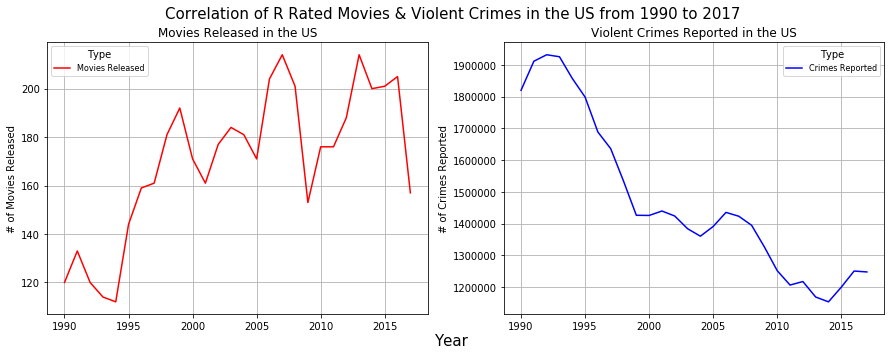

In [61]:
#Subplot
year = np.arange(1990,2018,1)
fig , axes = plt.subplots(1,2, sharex=True,sharey=False, figsize=(15,5))

plt.rcParams['axes.grid'] = True
fig.suptitle("Correlation of R Rated Movies & Violent Crimes in the US from 1990 to 2017", fontsize=15)

plt.ylabel('# of Crimes Reported')
plt.title('Violent Crimes Reported in the US')

movie_plot = axes[0].plot(year, number_R_movies, color='r', label = "Movies Released")
crime_plot = axes[1].plot(year, crimes_reported, color='b', label = "Crimes Reported")
axes[0].set_title("Movies Released in the US")
axes[0].set_ylabel("# of Movies Released")

fig.text(0.5, 0.04, 'Year', ha='center',fontsize=15)

# Create a legend
legend = axes[0].legend(fontsize=8, title = "Type", loc="best")
legend1 = axes[1].legend(fontsize=8, title="Type",loc="best")

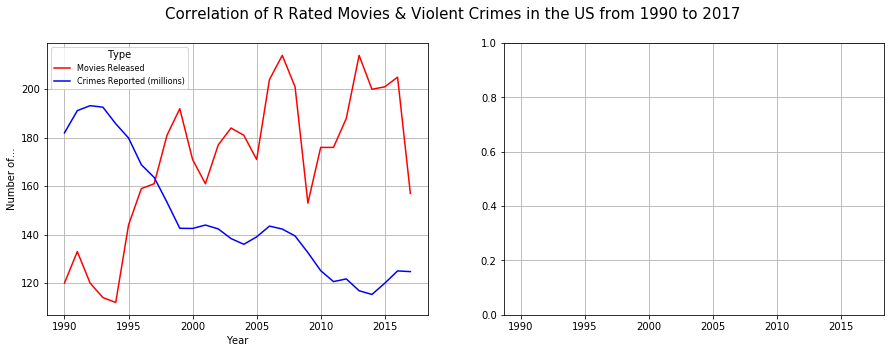

In [62]:
#overlay the plots in one graph to better compare
year = np.arange(1990,2018,1)
fig , axes = plt.subplots(1,2, sharex=True,sharey=False, figsize=(15,5))


#divide crime data by 10,000 so plots are more comparable

crime_sorted_ascending = crime_df.sort_index(ascending=False)
crimes_smaller_value = crime_sorted_ascending['Reported Violent Crimes'].div(10000)
plt.rcParams['axes.grid'] = True
fig.suptitle("Correlation of R Rated Movies & Violent Crimes in the US from 1990 to 2017", fontsize=15)

movie_plot = axes[0].plot(year, number_R_movies, color='r', label = "Movies Released")
crime_plot = axes[0].plot(year, crimes_smaller_value, color='b', label = "Crimes Reported (millions)")

axes[0].set_ylabel("Number of...")
axes[0].set_xlabel("Year")

# Create a legend
legend = axes[0].legend(fontsize=8, title = "Type", loc="best")

#in absolute terms, there does not appear to be a strong, positive correlation between the Number of R-rated moves released and the number of crimes reported in the US through 1990-2017
#there appears to be an inverse correlation suggesting that the more R rated movies released in the US, fewer violent cries are reported although there is no statistical signficance to prove this accuracy at this point

In [63]:
# calculate the percent change of # of movies released and crimes reported each year

#movie
movie_df = movie_df.set_index('Year')
movie_df = movie_df.sort_index(ascending=True)
movie_pct_change = movie_df.pct_change()
movie_pct_change.rename(columns={'R': 'Number of R-Rated Movies Released'}).head()

,Number of R-Rated Movies Released
Year,
1990,NaN
1991,0.108333
1992,-0.097744
1993,-0.050000
1994,-0.017544


In [64]:
crime_df = crime_df.set_index('Year')
crime_df = crime_df.sort_index(ascending=True)
crime_df.head()
crime_df['Reported Violent Crimes'] = pd.to_numeric(crime_df['Reported Violent Crimes'])
crime_df.head()
crime_pct_change = crime_df.pct_change()
crime_pct_change.head()

,Reported Violent Crimes
Year,
1990,NaN
1991,0.050348
1992,0.010727
1993,-0.003238
1994,-0.035486


<Figure size 432x288 with 0 Axes>

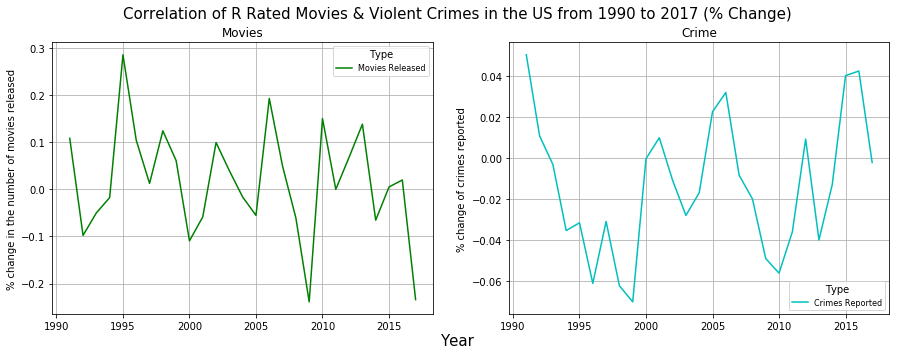

In [65]:
#plot and compare the percentage change year over year (1990-2017) for movies released and crimes reported in the US

fig5=plt.figure()

year = np.arange(1990,2018,1)
fig , axes = plt.subplots(1,2, sharex=True,sharey=False, figsize=(15,5))

plt.rcParams['axes.grid'] = True
fig.suptitle("Correlation of R Rated Movies & Violent Crimes in the US from 1990 to 2017 (% Change)", fontsize=15)

plt.ylabel('% change of crimes reported')
plt.title('Crime')

movie_plot_2 = axes[0].plot(year, movie_pct_change, color='g', label = "Movies Released")
crime_plot_2 = axes[1].plot(year, crime_pct_change, color='c', label = "Crimes Reported")
axes[0].set_title("Movies")
axes[0].set_ylabel("% change in the number of movies released")

fig.text(0.5, 0.04, 'Year', ha='center',fontsize=15)

# Create a legend
legend = axes[0].legend(fontsize=8, title = "Type", loc="best")
legend1 = axes[1].legend(fontsize=8, title="Type",loc="best")

fig5.savefig("CorrelationMoviesCrime_PercentChange.png")

<Figure size 432x288 with 0 Axes>

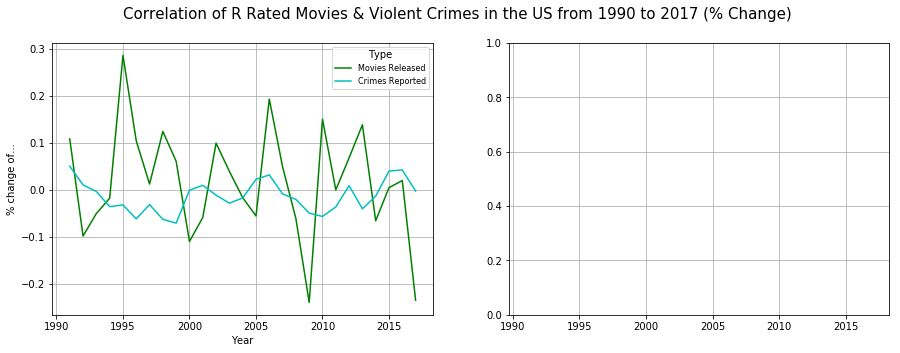

In [66]:
fig5=plt.figure()

#overlay the plots in one graph to better compare
year = np.arange(1990,2018,1)
fig , axes = plt.subplots(1,2, sharex=True,sharey=False, figsize=(15,5))

plt.rcParams['axes.grid'] = True
fig.suptitle("Correlation of R Rated Movies & Violent Crimes in the US from 1990 to 2017 (% Change)", fontsize=15)

movie_plot_2 = axes[0].plot(year, movie_pct_change, color='g', label = "Movies Released")
crime_plot_2 = axes[0].plot(year, crime_pct_change, color='c', label = "Crimes Reported")

axes[0].set_ylabel("% change of...")
axes[0].set_xlabel("Year")



# Create a legend
legend = axes[0].legend(fontsize=8, title = "Type", loc="best")

fig5.savefig('Correlation_MoviesCrime_percentchange_OVERLAY.png')

In [112]:
#R-Squared test for correlation between %change of movies released/crimes reported

# movie_pct_change
r = crime_pct_change["Reported Violent Crimes"].corr(movie_pct_change["R"])
print(r)

#R-squared cannot be negative? (should be between 0-100%)

-0.12173950416934151


#Now we will compare the number of movies released in the US from 2000 to 2017 with crimes reported in Chicago. We will look at the total number of crimes reported as well as compare movie data with specific types of crime.

In [85]:
# read the file with crime data (1.6gb - excel couldn't handle it)
crime_ch= pd.read_csv('ch_crimes.csv')
crime_ch.head()


# Read the movie data
movie_2_df = pd.read_csv('Movie_Year_R (1).csv')
movie_2_df.head()

,Year,R
0,2017,157
1,2016,205
2,2015,201
3,2014,200
4,2013,214


In [86]:
# merge two columns to create a unique "crime type"
crime_ch["cr_description"] = crime_ch["Primary Type"] + ' ' + crime_ch["Description"]

# select only columns needed
crime_ch = crime_ch[['ID','cr_description', 'Year']]
crime_ch.head()

,ID,cr_description,Year
0,3808342,THEFT OVER $500,2005
1,3808343,BATTERY DOMESTIC BATTERY SIMPLE,2005
2,3808344,BATTERY SIMPLE,2005
3,3808346,CRIMINAL DAMAGE TO VEHICLE,2005
4,3808347,THEFT FROM BUILDING,2005


In [87]:
# Select crimes prior to 2018 (to have same years as ovie data)
crime_ch = crime_ch.loc[crime_ch['Year'] < 2018]
crime_ch['Year'].unique()

array([2005, 2004, 2003, 2002, 2017, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2001])

In [88]:
# Select movies after 2000 to mach years in crime data
movie_2_df = movie_2_df.loc[movie_2_df['Year'] > 2000]
movie_2_df['Year'].unique()

array([2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007,
       2006, 2005, 2004, 2003, 2002, 2001])

In [89]:
# Count number of crimes for each year and each crime_description
grouped_crimes_ch = crime_ch.groupby(['Year','cr_description']).count()
grouped_crimes_ch = grouped_crimes_ch[['ID']]

# move "Year" and "Description" from index to columns
grouped_crimes_ch.reset_index(level=1, inplace=True)
grouped_crimes_ch.reset_index(level=0, inplace=True)

print(type(grouped_crimes_ch))
grouped_crimes_ch.head()

<class 'pandas.core.frame.DataFrame'>


,Year,cr_description,ID
0,2001,ARSON AGGRAVATED,186
1,2001,ARSON ATTEMPT ARSON,194
2,2001,ARSON BY EXPLOSIVE,3
3,2001,ARSON BY FIRE,621
4,2001,ARSON POS: EXPLOSIVE/INCENDIARY DEV,6


In [90]:
# Pivot data to see the number of crimes for each year (in line) and descriptin (in columns)

pivot = grouped_crimes_ch.pivot(index='Year', columns='cr_description', values='ID')
pivot

cr_description,ARSON AGGRAVATED,ARSON ATTEMPT ARSON,ARSON BY EXPLOSIVE,ARSON BY FIRE,ARSON POS: CHEMICAL/DRY-ICE DEVICE,ARSON POS: EXPLOSIVE/INCENDIARY DEV,ASSAULT AGG PO HANDS NO/MIN INJURY,ASSAULT AGG PRO.EMP: HANDGUN,ASSAULT AGG PRO.EMP: OTHER DANG WEAPON,ASSAULT AGG PRO.EMP: OTHER FIREARM,...,WEAPONS VIOLATION UNLAWFUL POSS OF HANDGUN,WEAPONS VIOLATION UNLAWFUL POSS OTHER FIREARM,WEAPONS VIOLATION UNLAWFUL SALE HANDGUN,WEAPONS VIOLATION UNLAWFUL SALE OTHER FIREARM,WEAPONS VIOLATION UNLAWFUL SALE/DELIVERY OF FIREARM AT SCHOOL,WEAPONS VIOLATION UNLAWFUL USE HANDGUN,WEAPONS VIOLATION UNLAWFUL USE OTHER DANG WEAPON,WEAPONS VIOLATION UNLAWFUL USE OTHER FIREARM,WEAPONS VIOLATION UNLAWFUL USE/SALE AIR RIFLE,WEAPONS VIOLATION USE OF METAL PIERCING BULLETS
Year,,,,,,,,,,,,,,,,,,,,,
2001,186.0,194.0,3.0,621.0,NaN,6.0,98.0,NaN,NaN,NaN,...,2525.0,195.0,21.0,7.0,NaN,193.0,815.0,58.0,350.0,NaN
2002,202.0,181.0,12.0,628.0,7.0,2.0,106.0,4.0,43.0,5.0,...,2585.0,214.0,18.0,5.0,12.0,161.0,817.0,42.0,283.0,NaN
2003,182.0,138.0,7.0,623.0,NaN,5.0,195.0,18.0,95.0,11.0,...,2622.0,200.0,23.0,6.0,23.0,153.0,767.0,26.0,175.0,NaN
2004,161.0,141.0,5.0,465.0,2.0,4.0,248.0,13.0,93.0,8.0,...,2637.0,205.0,24.0,3.0,13.0,137.0,780.0,17.0,174.0,1.0
2005,134.0,122.0,7.0,422.0,3.0,3.0,283.0,20.0,98.0,3.0,...,2658.0,186.0,18.0,3.0,14.0,116.0,663.0,14.0,203.0,NaN
2006,137.0,117.0,8.0,449.0,8.0,7.0,343.0,16.0,81.0,8.0,...,2514.0,190.0,11.0,2.0,11.0,114.0,525.0,13.0,169.0,NaN
2007,107.0,121.0,14.0,459.0,6.0,5.0,405.0,22.0,85.0,8.0,...,2269.0,145.0,9.0,1.0,17.0,122.0,543.0,17.0,159.0,1.0
2008,97.0,104.0,8.0,422.0,6.0,7.0,401.0,26.0,79.0,10.0,...,2529.0,155.0,8.0,2.0,19.0,132.0,575.0,33.0,140.0,1.0
2009,80.0,98.0,4.0,425.0,4.0,5.0,523.0,23.0,83.0,6.0,...,2784.0,165.0,14.0,35.0,12.0,142.0,502.0,22.0,121.0,NaN


In [91]:
# Calculate percentage change for each crime description year over year

crime_pct_change_2 = pivot.pct_change()
crime_pct_change_2

cr_description,ARSON AGGRAVATED,ARSON ATTEMPT ARSON,ARSON BY EXPLOSIVE,ARSON BY FIRE,ARSON POS: CHEMICAL/DRY-ICE DEVICE,ARSON POS: EXPLOSIVE/INCENDIARY DEV,ASSAULT AGG PO HANDS NO/MIN INJURY,ASSAULT AGG PRO.EMP: HANDGUN,ASSAULT AGG PRO.EMP: OTHER DANG WEAPON,ASSAULT AGG PRO.EMP: OTHER FIREARM,...,WEAPONS VIOLATION UNLAWFUL POSS OF HANDGUN,WEAPONS VIOLATION UNLAWFUL POSS OTHER FIREARM,WEAPONS VIOLATION UNLAWFUL SALE HANDGUN,WEAPONS VIOLATION UNLAWFUL SALE OTHER FIREARM,WEAPONS VIOLATION UNLAWFUL SALE/DELIVERY OF FIREARM AT SCHOOL,WEAPONS VIOLATION UNLAWFUL USE HANDGUN,WEAPONS VIOLATION UNLAWFUL USE OTHER DANG WEAPON,WEAPONS VIOLATION UNLAWFUL USE OTHER FIREARM,WEAPONS VIOLATION UNLAWFUL USE/SALE AIR RIFLE,WEAPONS VIOLATION USE OF METAL PIERCING BULLETS
Year,,,,,,,,,,,,,,,,,,,,,
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,0.086022,-0.067010,3.000000,0.011272,NaN,-0.666667,0.081633,NaN,NaN,NaN,...,0.023762,0.097436,-0.142857,-0.285714,NaN,-0.165803,0.002454,-0.275862,-0.191429,NaN
2003,-0.099010,-0.237569,-0.416667,-0.007962,0.000000,1.500000,0.839623,3.500000,1.209302,1.200000,...,0.014313,-0.065421,0.277778,0.200000,0.916667,-0.049689,-0.061200,-0.380952,-0.381625,NaN
2004,-0.115385,0.021739,-0.285714,-0.253612,-0.714286,-0.200000,0.271795,-0.277778,-0.021053,-0.272727,...,0.005721,0.025000,0.043478,-0.500000,-0.434783,-0.104575,0.016949,-0.346154,-0.005714,NaN
2005,-0.167702,-0.134752,0.400000,-0.092473,0.500000,-0.250000,0.141129,0.538462,0.053763,-0.625000,...,0.007964,-0.092683,-0.250000,0.000000,0.076923,-0.153285,-0.150000,-0.176471,0.166667,0.0
2006,0.022388,-0.040984,0.142857,0.063981,1.666667,1.333333,0.212014,-0.200000,-0.173469,1.666667,...,-0.054176,0.021505,-0.388889,-0.333333,-0.214286,-0.017241,-0.208145,-0.071429,-0.167488,0.0
2007,-0.218978,0.034188,0.750000,0.022272,-0.250000,-0.285714,0.180758,0.375000,0.049383,0.000000,...,-0.097454,-0.236842,-0.181818,-0.500000,0.545455,0.070175,0.034286,0.307692,-0.059172,0.0
2008,-0.093458,-0.140496,-0.428571,-0.080610,0.000000,0.400000,-0.009877,0.181818,-0.070588,0.250000,...,0.114588,0.068966,-0.111111,1.000000,0.117647,0.081967,0.058932,0.941176,-0.119497,0.0
2009,-0.175258,-0.057692,-0.500000,0.007109,-0.333333,-0.285714,0.304239,-0.115385,0.050633,-0.400000,...,0.100830,0.064516,0.750000,16.500000,-0.368421,0.075758,-0.126957,-0.333333,-0.135714,0.0


In [92]:
# Sort moviesAscending to mach the sequence of the crime data (for the next step)

movie_2_df.sort_values(by='Year', ascending=True, inplace=True)
movie_2_df.head()



,Year,R
16,2001,161
15,2002,177
14,2003,184
13,2004,181
12,2005,171


In [93]:
#Calculate percentage change year over year

movie_pct_change_2 = movie_df.pct_change()
movie_pct_change_2.head()

,R
Year,
1990,NaN
1991,0.108333
1992,-0.097744
1993,-0.050000
1994,-0.017544


In [94]:
# Merge movie and crime percentage change data

merged = movie_pct_change_2.merge(crime_pct_change_2, left_index=True, right_index=True)
merged

,R,ARSON AGGRAVATED,ARSON ATTEMPT ARSON,ARSON BY EXPLOSIVE,ARSON BY FIRE,ARSON POS: CHEMICAL/DRY-ICE DEVICE,ARSON POS: EXPLOSIVE/INCENDIARY DEV,ASSAULT AGG PO HANDS NO/MIN INJURY,ASSAULT AGG PRO.EMP: HANDGUN,ASSAULT AGG PRO.EMP: OTHER DANG WEAPON,...,WEAPONS VIOLATION UNLAWFUL POSS OF HANDGUN,WEAPONS VIOLATION UNLAWFUL POSS OTHER FIREARM,WEAPONS VIOLATION UNLAWFUL SALE HANDGUN,WEAPONS VIOLATION UNLAWFUL SALE OTHER FIREARM,WEAPONS VIOLATION UNLAWFUL SALE/DELIVERY OF FIREARM AT SCHOOL,WEAPONS VIOLATION UNLAWFUL USE HANDGUN,WEAPONS VIOLATION UNLAWFUL USE OTHER DANG WEAPON,WEAPONS VIOLATION UNLAWFUL USE OTHER FIREARM,WEAPONS VIOLATION UNLAWFUL USE/SALE AIR RIFLE,WEAPONS VIOLATION USE OF METAL PIERCING BULLETS
Year,,,,,,,,,,,,,,,,,,,,,
2001,-0.058480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,0.099379,0.086022,-0.067010,3.000000,0.011272,NaN,-0.666667,0.081633,NaN,NaN,...,0.023762,0.097436,-0.142857,-0.285714,NaN,-0.165803,0.002454,-0.275862,-0.191429,NaN
2003,0.039548,-0.099010,-0.237569,-0.416667,-0.007962,0.000000,1.500000,0.839623,3.500000,1.209302,...,0.014313,-0.065421,0.277778,0.200000,0.916667,-0.049689,-0.061200,-0.380952,-0.381625,NaN
2004,-0.016304,-0.115385,0.021739,-0.285714,-0.253612,-0.714286,-0.200000,0.271795,-0.277778,-0.021053,...,0.005721,0.025000,0.043478,-0.500000,-0.434783,-0.104575,0.016949,-0.346154,-0.005714,NaN
2005,-0.055249,-0.167702,-0.134752,0.400000,-0.092473,0.500000,-0.250000,0.141129,0.538462,0.053763,...,0.007964,-0.092683,-0.250000,0.000000,0.076923,-0.153285,-0.150000,-0.176471,0.166667,0.0
2006,0.192982,0.022388,-0.040984,0.142857,0.063981,1.666667,1.333333,0.212014,-0.200000,-0.173469,...,-0.054176,0.021505,-0.388889,-0.333333,-0.214286,-0.017241,-0.208145,-0.071429,-0.167488,0.0
2007,0.049020,-0.218978,0.034188,0.750000,0.022272,-0.250000,-0.285714,0.180758,0.375000,0.049383,...,-0.097454,-0.236842,-0.181818,-0.500000,0.545455,0.070175,0.034286,0.307692,-0.059172,0.0
2008,-0.060748,-0.093458,-0.140496,-0.428571,-0.080610,0.000000,0.400000,-0.009877,0.181818,-0.070588,...,0.114588,0.068966,-0.111111,1.000000,0.117647,0.081967,0.058932,0.941176,-0.119497,0.0
2009,-0.238806,-0.175258,-0.057692,-0.500000,0.007109,-0.333333,-0.285714,0.304239,-0.115385,0.050633,...,0.100830,0.064516,0.750000,16.500000,-0.368421,0.075758,-0.126957,-0.333333,-0.135714,0.0


In [104]:
# Create a list with all crime types for the next step

columns = list(merged)
columns


['Year',
 'R',
 'ARSON AGGRAVATED',
 'ARSON ATTEMPT ARSON',
 'ARSON BY EXPLOSIVE',
 'ARSON BY FIRE',
 'ARSON POS: CHEMICAL/DRY-ICE DEVICE',
 'ARSON POS: EXPLOSIVE/INCENDIARY DEV',
 'ASSAULT AGG PO HANDS NO/MIN INJURY',
 'ASSAULT AGG PRO.EMP: HANDGUN',
 'ASSAULT AGG PRO.EMP: OTHER DANG WEAPON',
 'ASSAULT AGG PRO.EMP: OTHER FIREARM',
 'ASSAULT AGG PRO.EMP:KNIFE/CUTTING INST',
 'ASSAULT AGGRAVATED PO: HANDGUN',
 'ASSAULT AGGRAVATED PO: OTHER DANG WEAP',
 'ASSAULT AGGRAVATED PO: OTHER FIREARM',
 'ASSAULT AGGRAVATED PO:KNIFE/CUT INSTR',
 'ASSAULT AGGRAVATED: HANDGUN',
 'ASSAULT AGGRAVATED: OTHER DANG WEAPON',
 'ASSAULT AGGRAVATED: OTHER FIREARM',
 'ASSAULT AGGRAVATED:KNIFE/CUTTING INSTR',
 'ASSAULT PRO EMP HANDS NO/MIN INJURY',
 'ASSAULT SIMPLE',
 'BATTERY AGG PO HANDS ETC SERIOUS INJ',
 'BATTERY AGG PO HANDS NO/MIN INJURY',
 'BATTERY AGG PRO EMP HANDS SERIOUS INJ',
 'BATTERY AGG PRO.EMP: HANDGUN',
 'BATTERY AGG PRO.EMP: OTHER DANG WEAPON',
 'BATTERY AGG PRO.EMP: OTHER FIREARM',
 'BATTERY A

In [96]:
# Create an empty dataframe (as a container) for the next step

all_crime_types = pd.DataFrame({
    'Crime_Type': '',
    'R2': ''}, index=[0])


In [97]:
# Loop through crime types from the list created above and
# calculate relation (R^2) to the number of movies:
# Record the calculation to a new dataframe
# Append the dataframe created above with the calculated data

for crime_type in columns[1:]:
    crime_type_d = crime_type
    r_2 = float(merged['R'].corr(merged[crime_type]))
    curr_crime_df = pd.DataFrame({
        'Crime_Type': crime_type_d,
        'R2': r_2}, index=[0])
    all_crime_types = all_crime_types.append(curr_crime_df)


all_crime_types


/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Crime_Type,R2
0,,
0,ARSON AGGRAVATED,0.277068
0,ARSON ATTEMPT ARSON,0.263563
0,ARSON BY EXPLOSIVE,0.280769
0,ARSON BY FIRE,-0.148793
0,ARSON POS: CHEMICAL/DRY-ICE DEVICE,0.274061
0,ARSON POS: EXPLOSIVE/INCENDIARY DEV,0.41363
0,ASSAULT AGG PO HANDS NO/MIN INJURY,0.0167918
0,ASSAULT AGG PRO.EMP: HANDGUN,-0.0314824
0,ASSAULT AGG PRO.EMP: OTHER DANG WEAPON,-0.247818


In [98]:
# Convert calculated value to a float (from string)


all_crime_types['R2'] = pd.to_numeric(all_crime_types['R2'])
all_crime_types



,Crime_Type,R2
0,,NaN
0,ARSON AGGRAVATED,0.277068
0,ARSON ATTEMPT ARSON,0.263563
0,ARSON BY EXPLOSIVE,0.280769
0,ARSON BY FIRE,-0.148793
0,ARSON POS: CHEMICAL/DRY-ICE DEVICE,0.274061
0,ARSON POS: EXPLOSIVE/INCENDIARY DEV,0.413630
0,ASSAULT AGG PO HANDS NO/MIN INJURY,0.016792
0,ASSAULT AGG PRO.EMP: HANDGUN,-0.031482
0,ASSAULT AGG PRO.EMP: OTHER DANG WEAPON,-0.247818


In [99]:
# Rank relation of the crime to the namber of movies

all_crime_types.sort_values(by=['R2'],ascending=False)

,Crime_Type,R2
0,NON-CRIMINAL FOID - REVOCATION,1.000000
0,OTHER OFFENSE ARSONIST: ANNUAL REGISTRATION,1.000000
0,OTHER OFFENSE VIOLENT OFFENDER: FAIL TO REGIST...,0.678812
0,DECEPTIVE PRACTICE EMBEZZLEMENT,0.613656
0,GAMBLING ILLEGAL ILL LOTTERY,0.594068
0,HUMAN TRAFFICKING INVOLUNTARY SERVITUDE,0.579959
0,DECEPTIVE PRACTICE POSS. KEYS OR DEV.TO COIN MACH,0.567618
0,INTERFERENCE WITH PUBLIC OFFICER OBSTRUCTING S...,0.551320
0,OFFENSE INVOLVING CHILDREN POS: PORNOGRAPHIC P...,0.524979
0,INTERFERENCE WITH PUBLIC OFFICER BRIBERY,0.520488


In [100]:
# Move year column out from the index 

merged = merged.reset_index(level=0)
merged

,Year,R,ARSON AGGRAVATED,ARSON ATTEMPT ARSON,ARSON BY EXPLOSIVE,ARSON BY FIRE,ARSON POS: CHEMICAL/DRY-ICE DEVICE,ARSON POS: EXPLOSIVE/INCENDIARY DEV,ASSAULT AGG PO HANDS NO/MIN INJURY,ASSAULT AGG PRO.EMP: HANDGUN,...,WEAPONS VIOLATION UNLAWFUL POSS OF HANDGUN,WEAPONS VIOLATION UNLAWFUL POSS OTHER FIREARM,WEAPONS VIOLATION UNLAWFUL SALE HANDGUN,WEAPONS VIOLATION UNLAWFUL SALE OTHER FIREARM,WEAPONS VIOLATION UNLAWFUL SALE/DELIVERY OF FIREARM AT SCHOOL,WEAPONS VIOLATION UNLAWFUL USE HANDGUN,WEAPONS VIOLATION UNLAWFUL USE OTHER DANG WEAPON,WEAPONS VIOLATION UNLAWFUL USE OTHER FIREARM,WEAPONS VIOLATION UNLAWFUL USE/SALE AIR RIFLE,WEAPONS VIOLATION USE OF METAL PIERCING BULLETS
0,2001,-0.058480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002,0.099379,0.086022,-0.067010,3.000000,0.011272,NaN,-0.666667,0.081633,NaN,...,0.023762,0.097436,-0.142857,-0.285714,NaN,-0.165803,0.002454,-0.275862,-0.191429,NaN
2,2003,0.039548,-0.099010,-0.237569,-0.416667,-0.007962,0.000000,1.500000,0.839623,3.500000,...,0.014313,-0.065421,0.277778,0.200000,0.916667,-0.049689,-0.061200,-0.380952,-0.381625,NaN
3,2004,-0.016304,-0.115385,0.021739,-0.285714,-0.253612,-0.714286,-0.200000,0.271795,-0.277778,...,0.005721,0.025000,0.043478,-0.500000,-0.434783,-0.104575,0.016949,-0.346154,-0.005714,NaN
4,2005,-0.055249,-0.167702,-0.134752,0.400000,-0.092473,0.500000,-0.250000,0.141129,0.538462,...,0.007964,-0.092683,-0.250000,0.000000,0.076923,-0.153285,-0.150000,-0.176471,0.166667,0.0
5,2006,0.192982,0.022388,-0.040984,0.142857,0.063981,1.666667,1.333333,0.212014,-0.200000,...,-0.054176,0.021505,-0.388889,-0.333333,-0.214286,-0.017241,-0.208145,-0.071429,-0.167488,0.0
6,2007,0.049020,-0.218978,0.034188,0.750000,0.022272,-0.250000,-0.285714,0.180758,0.375000,...,-0.097454,-0.236842,-0.181818,-0.500000,0.545455,0.070175,0.034286,0.307692,-0.059172,0.0
7,2008,-0.060748,-0.093458,-0.140496,-0.428571,-0.080610,0.000000,0.400000,-0.009877,0.181818,...,0.114588,0.068966,-0.111111,1.000000,0.117647,0.081967,0.058932,0.941176,-0.119497,0.0
8,2009,-0.238806,-0.175258,-0.057692,-0.500000,0.007109,-0.333333,-0.285714,0.304239,-0.115385,...,0.100830,0.064516,0.750000,16.500000,-0.368421,0.075758,-0.126957,-0.333333,-0.135714,0.0
9,2010,0.150327,0.025000,-0.010204,0.500000,-0.230588,-0.750000,0.800000,0.063098,-0.304348,...,-0.112069,-0.133333,-0.142857,-0.685714,0.000000,-0.091549,-0.041833,-0.272727,-0.082645,0.0


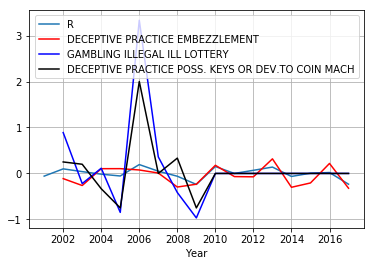

In [101]:
# Plot top 3 crime types from the sorteed "all_crime_types" dataframe

ax = plt.gca()

merged.plot(kind='line',x='Year',y='R',ax=ax)
merged.plot(kind='line',x='Year',y='DECEPTIVE PRACTICE EMBEZZLEMENT', color='red',ax=ax)
merged.plot(kind='line',x='Year',y='GAMBLING ILLEGAL ILL LOTTERY', color='blue', ax=ax)
merged.plot(kind='line',x='Year',y='DECEPTIVE PRACTICE POSS. KEYS OR DEV.TO COIN MACH', color='black', ax=ax)

plt.show()